In [16]:
# Load modules
%pylab inline
from netCDF4 import Dataset # to work with NetCDF files
import numpy as np
import matplotlib.pyplot as plt # to generate plots
from os.path import expanduser
home = expanduser("~") # Get users home directory
import os # operating system interface
import scipy as sp
import xarray as xr
#from xarray.ufuncs import square, sqrt
import scipy.interpolate
import scipy.ndimage
import scipy.stats
import cmocean as cmocean

Populating the interactive namespace from numpy and matplotlib


In [17]:
#extract the MOM model grid info - 50 and 75 vertical levels
hgrid_file ='/g/data/v45/pas561/mom/archive/mom025_ocean_grid.nc'

# Extract the variables
nc = Dataset(hgrid_file, mode='r') # file handle, open in read only mode
geolon_t = nc.variables['geolon_t'][:]
geolat_t = nc.variables['geolat_t'][:]
area_t = nc.variables['area_t'][:]
dxt = nc.variables['dxt'][:]
dyt = nc.variables['dyt'][:]
kmu = nc.variables['kmu'][:]
kmt = nc.variables['kmt'][:]
ht = nc.variables['ht'][:]
fcor = nc.variables['f_coriolis'][:]
nc.close() # close the file
#print geolon_t.shape

fh=fcor/ht
#print fh.shape

vgrid_file ='/g/data/v45/pas561/mom/archive/wombat_jun16z/output1981/ocean__1980_07.nc' #ocean.ncra501-520.nc'

nc = Dataset(vgrid_file, mode='r') # file handle, open in read only mode
sw_ocean = nc.variables['sw_ocean'][:]
st_ocean = nc.variables['st_ocean'][:]
yt_ocean = nc.variables['yt_ocean'][:]
yu_ocean = nc.variables['yu_ocean'][:]
xt_ocean = nc.variables['xt_ocean'][:]
potrho = nc.variables['potrho'][:]
nc.close() # close the file
#print st_ocean.shape
#print potrho.shape
#print yt_ocean.shape

mom025_yu_ocean=yu_ocean
mom025_potrho=potrho

In [18]:
msk025=np.zeros((kmt.shape[0],kmt.shape[1]),dtype=float)
msk025.fill(1)
msk025[np.where(kmt>=1)]=np.nan

/g/data3/hh5/public/apps/miniconda3/envs/analysis27-18.10/lib/python2.7/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


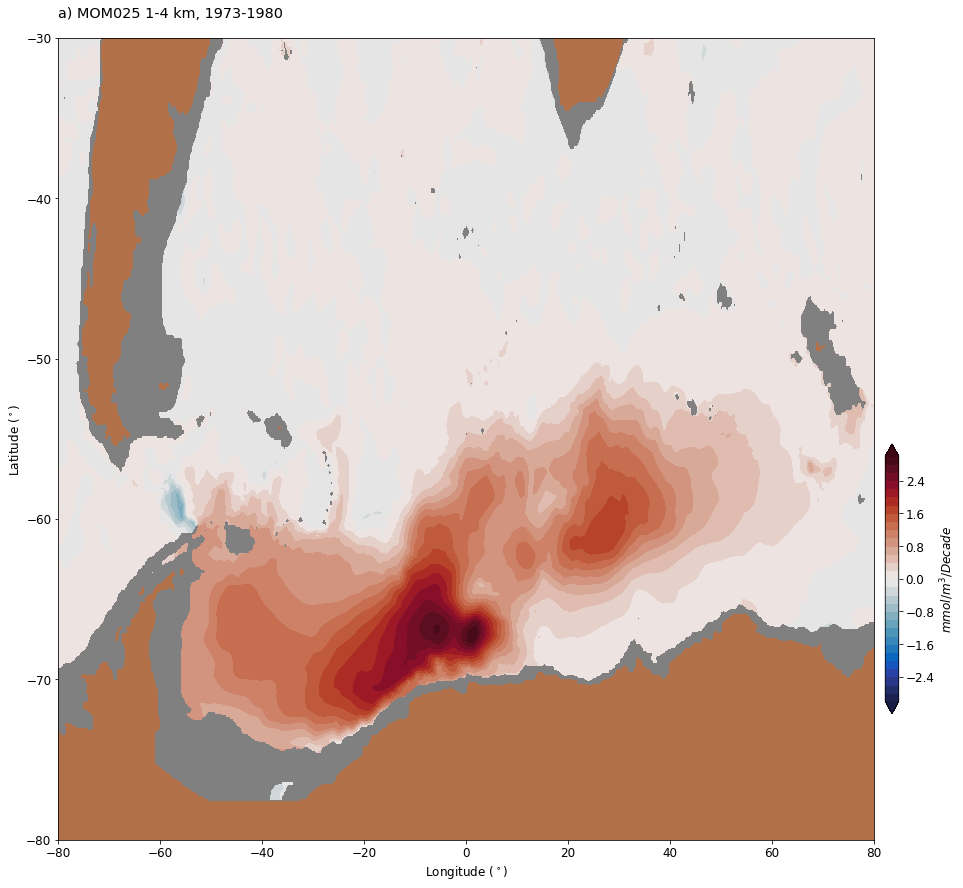

In [4]:
fontsize=12
plt.rcParams['font.size'] = fontsize

plt.figure(figsize(12.5,12.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

clev = np.arange(-3.,3.2,.2)

NYFCntrlDir = '/g/data/v45/pas561/mom/archive/wombat_jun16z/'
#this has 3 years of a wind perturbation - get a nice 3 year polynya.
NYFPertDir = '/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/'

of=os.path.join(NYFPertDir,'np_tr73to80_cO_1to4.npy')
c=np.load(of)

of=os.path.join(NYFPertDir,'np_tr73to80_pO_1to4.npy')
p=np.load(of)


pmax=0.05

#m=xr.open_dataset('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr73to80_Oanom_1to4_m.nc').__xarray_dataarray_variable__*10
#p2=xr.open_dataset('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr73to80_Oanom_1to4_p.nc').__xarray_dataarray_variable__
#mp=m.where(p2<=pmax).values

#clev = np.arange(-.01,.011,.001)
#print clev

plt.subplot(1,1,1)
plt.gca().patch.set_color('.5')
p1=plt.contourf(geolon_t[0:500,:],geolat_t[0:500,:],(p-c)*10, cmap=cmocean.cm.balance, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#p2=plt.contourf(geolon_t[0:500,:],geolat_t[0:500,:],mp, colors='none',hatches='x') #CMRmap_r, gist_stern_r
p3=plt.contourf(geolon_t[0:500,:],geolat_t[0:500,:],msk025[0:500,:],cmap=plt.cm.copper)

plt.xlim((-80,80))
plt.ylim((-80,-30))
plt.xlabel('Longitude ($^\circ$)')
plt.ylabel('Latitude ($^\circ$)')
plt.title('a) MOM025 1-4 km, 1973-1980',pad=20,loc='left')

    
ax3 = plt.axes([0.99,0.20,0.015,0.3])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
##ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_ylabel('$mmol/m^3/Decade$')

plt.tight_layout()

In [24]:
of=os.path.join(NYFCntrlDir,'cO_1to4.npy')
c=np.load(of)
print(c.shape)

c=np.reshape(c,(49,12,1080,1440)).mean(1)
print(c.shape)

(588, 1080, 1440)
(49, 1080, 1440)


In [25]:
of=os.path.join(NYFPertDir,'pO_1to4.npy')
p=np.load(of)
print(p.shape)

p=np.reshape(p,(44,12,1080,1440)).mean(1)
print(p.shape)

(528, 1080, 1440)
(44, 1080, 1440)


In [7]:
np_tr73to80_pO=np.zeros((500,1440))
np_tr73to80_cO=np.zeros((500,1440))

for j in range(0,500):
    #print j
    
    np_tr73to80_pO[j,:]=np.polyfit(range(8), p[0:8,j,:],1)[0,:]
    
    np_tr73to80_cO[j,:]=np.polyfit(range(8), c[0:8,j,:],1)[0,:]

#of=os.path.join(NYFPertDir,'np_tr73to80_pO_1to4.npy')
#a=np.save(of,np_tr73to80_pO)

#of=os.path.join(NYFPertDir,'np_tr73to80_cO_1to4.npy')
#a=np.save(of,np_tr73to80_cO)

In [8]:
#a=varP[0:528,:,:]-varC[0:528,:,:]

clev = np.arange(-30.,31,1)
clev

array([-30., -29., -28., -27., -26., -25., -24., -23., -22., -21., -20.,
       -19., -18., -17., -16., -15., -14., -13., -12., -11., -10.,  -9.,
        -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,   2.,
         3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,
        14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,
        25.,  26.,  27.,  28.,  29.,  30.])

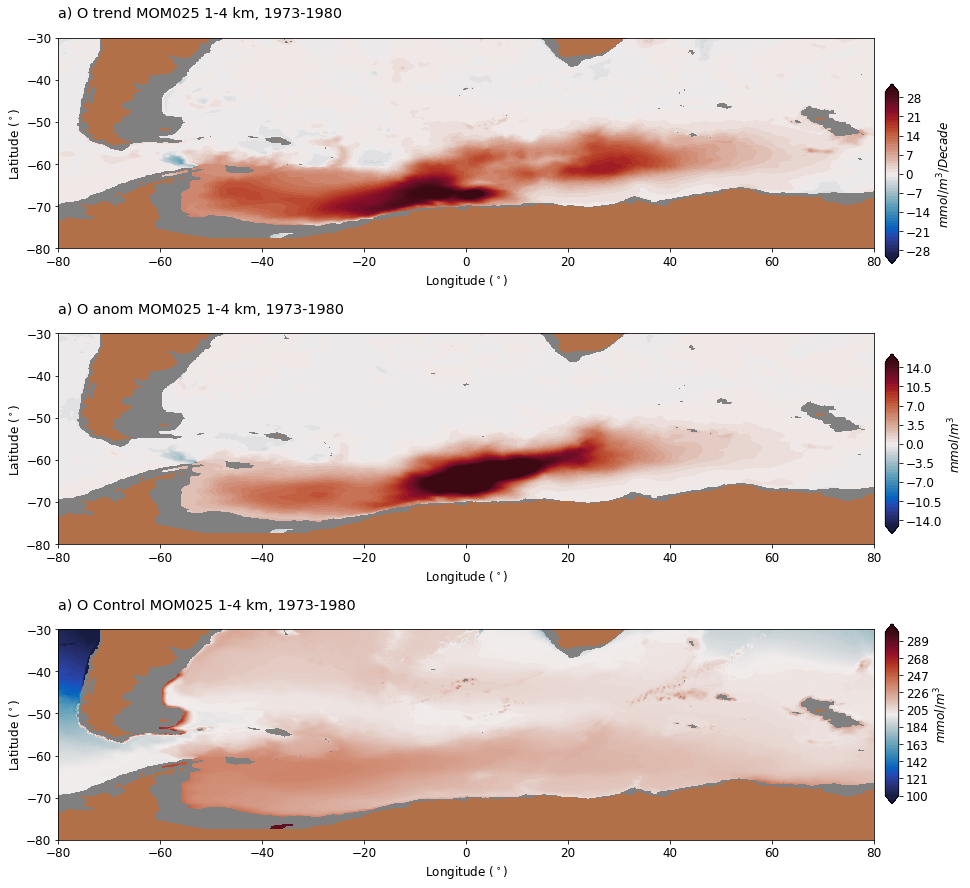

In [9]:
fontsize=12
plt.rcParams['font.size'] = fontsize

plt.figure(figsize(12.5,12.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

clev = np.arange(-30.,31,1)

m=np_tr73to80_pO-np_tr73to80_cO

pmax=0.05

plt.subplot(3,1,1)
plt.gca().patch.set_color('.5')
p1=plt.contourf(geolon_t[0:500,:],geolat_t[0:500,:],m[0:500,:]*10, cmap=cmocean.cm.balance, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#p2=plt.contourf(geolon_t[0:500,:],geolat_t[0:500,:],mp, colors='none',hatches='x') #CMRmap_r, gist_stern_r
p3=plt.contourf(geolon_t[0:500,:],geolat_t[0:500,:],msk025[0:500,:],cmap=plt.cm.copper)

plt.xlim((-80,80))
plt.ylim((-80,-30))
plt.xlabel('Longitude ($^\circ$)')
plt.ylabel('Latitude ($^\circ$)')
plt.title('a) O trend MOM025 1-4 km, 1973-1980',pad=20,loc='left')

    
ax3 = plt.axes([0.99,0.70,0.015,0.2])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
##ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_ylabel('$mmol/m^3/Decade$')

clev = np.arange(-15.,15.5,.5)
anom=np.mean((p[0:8,:,:]-c[0:8,:,:]),0)

pmax=0.05

plt.subplot(3,1,2)
plt.gca().patch.set_color('.5')
p1=plt.contourf(geolon_t[0:500,:],geolat_t[0:500,:],anom[0:500,:], cmap=cmocean.cm.balance, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#p2=plt.contourf(geolon_t[0:500,:],geolat_t[0:500,:],mp, colors='none',hatches='x') #CMRmap_r, gist_stern_r
p3=plt.contourf(geolon_t[0:500,:],geolat_t[0:500,:],msk025[0:500,:],cmap=plt.cm.copper)

plt.xlim((-80,80))
plt.ylim((-80,-30))
plt.xlabel('Longitude ($^\circ$)')
plt.ylabel('Latitude ($^\circ$)')
plt.title('a) O anom MOM025 1-4 km, 1973-1980',pad=20,loc='left')

    
ax3 = plt.axes([0.99,0.4,0.015,0.2])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
##ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_ylabel('$mmol/m^3$')

clev = np.arange(100,301,1)

plt.subplot(3,1,3)
plt.gca().patch.set_color('.5')
p1=plt.contourf(geolon_t[0:500,:],geolat_t[0:500,:],np.mean((c[0:8,:,:]),0)[0:500,:], cmap=cmocean.cm.balance, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#p2=plt.contourf(geolon_t[0:500,:],geolat_t[0:500,:],mp, colors='none',hatches='x') #CMRmap_r, gist_stern_r
p3=plt.contourf(geolon_t[0:500,:],geolat_t[0:500,:],msk025[0:500,:],cmap=plt.cm.copper)

plt.xlim((-80,80))
plt.ylim((-80,-30))
plt.xlabel('Longitude ($^\circ$)')
plt.ylabel('Latitude ($^\circ$)')
plt.title('a) O Control MOM025 1-4 km, 1973-1980',pad=20,loc='left')

    
ax3 = plt.axes([0.99,0.10,0.015,0.2])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
##ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_ylabel('$mmol/m^3$')

plt.tight_layout()

In [21]:
#anom=varP[0:8*12,:,:]-varC[0:8*12,:,:]

anom=p[0:8,:,:]-c[0:8,:,:]

print(anom.shape)

tr_anom_m=np.zeros((500,1440))
tr_anom_p=np.zeros((500,1440))

for j in range(0,500):
    #print(j)
    
    for i in range(0,1440):
        
        tmp=sp.stats.linregress(range(8), anom[0:8,j,i])
        tr_anom_m[j,i]=tmp.slope
        tr_anom_p[j,i]=tmp.pvalue

np.save('/g/data/jk72/pas561/mom/archive/wombat_jun16z_wp2_74_stats/np_tr73to80_Oanom_1to4_m.npy',tr_anom_m)
np.save('/g/data/jk72/pas561/mom/archive/wombat_jun16z_wp2_74_stats/np_tr73to80_Oanom_1to4_p.npy',tr_anom_p)

(8, 1080, 1440)


In [27]:
#anom=varP[0:8*12,:,:]-varC[0:8*12,:,:]

anom=p[8:18,:,:]-c[8:18,:,:]

print(anom.shape)

tr_anom_m=np.zeros((500,1440))
tr_anom_p=np.zeros((500,1440))

for j in range(0,500):
    #print(j)
    
    for i in range(0,1440):
        
        tmp=sp.stats.linregress(range(10), anom[0:10,j,i])
        tr_anom_m[j,i]=tmp.slope
        tr_anom_p[j,i]=tmp.pvalue

np.save('/g/data/jk72/pas561/mom/archive/wombat_jun16z_wp2_74_stats/np_tr81to90_Oanom_1to4_m.npy',tr_anom_m)
np.save('/g/data/jk72/pas561/mom/archive/wombat_jun16z_wp2_74_stats/np_tr81to90_Oanom_1to4_p.npy',tr_anom_p)

(10, 1080, 1440)


In [107]:
of=os.path.join(NYFCntrlDir,'cO_4to6.npy')
c=np.load(of)
print(c.shape)

c=np.reshape(c,(49,12,1080,1440)).mean(1)
print(c.shape)

(588, 1080, 1440)
(49, 1080, 1440)


In [115]:
of=os.path.join(NYFPertDir,'pO_4to6.npy')
p=np.load(of)
print(p.shape)

p=np.reshape(p,(44,12,1080,1440)).mean(1)
print(p.shape)

(528, 1080, 1440)
(44, 1080, 1440)


In [100]:
#anom=varP[0:8*12,:,:]-varC[0:8*12,:,:]

anom=p[0:8,:,:]-c[0:8,:,:]

print(anom.shape)

tr_anom_m=np.zeros((500,1440))
tr_anom_p=np.zeros((500,1440))

for j in range(0,500):
    #print(j)
    
    for i in range(0,1440):
        
        tmp=sp.stats.linregress(range(8), anom[0:8,j,i])
        tr_anom_m[j,i]=tmp.slope
        tr_anom_p[j,i]=tmp.pvalue

np.save('/g/data/jk72/pas561/mom/archive/wombat_jun16z_wp2_74_stats/np_tr73to80_Oanom_4to6_m.npy',tr_anom_m)
np.save('/g/data/jk72/pas561/mom/archive/wombat_jun16z_wp2_74_stats/np_tr73to80_Oanom_4to6_p.npy',tr_anom_p)

(8, 1080, 1440)


In [116]:
#anom=varP[0:8*12,:,:]-varC[0:8*12,:,:]

anom=p[28:44,:,:]-c[28:44,:,:]

print(anom.shape)

tr_anom_m=np.zeros((500,1440))
tr_anom_p=np.zeros((500,1440))

for j in range(0,500):
    #print(j)
    
    for i in range(0,1440):
        
        tmp=sp.stats.linregress(range(15), anom[0:15,j,i])
        tr_anom_m[j,i]=tmp.slope
        tr_anom_p[j,i]=tmp.pvalue

np.save('/g/data/jk72/pas561/mom/archive/wombat_jun16z_wp2_74_stats/np_tr01to15_Oanom_4to6_m.npy',tr_anom_m)
np.save('/g/data/jk72/pas561/mom/archive/wombat_jun16z_wp2_74_stats/np_tr01to15_Oanom_4to6_p.npy',tr_anom_p)

(16, 1080, 1440)


tr_m = xr.DataArray(tr_anom_m, 
coords={'yt_ocean':yt_ocean[0:500] ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr73to80_Oanom_1to4_m.nc')

tr_p = xr.DataArray(tr_anom_p, 
coords={'yt_ocean':yt_ocean[0:500] ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr73to80_Oanom_1to4_p.nc')


In [95]:
tr_anom_m=np.load('/g/data/jk72/pas561/mom/archive/wombat_jun16z_wp2_74_stats/np_tr73to80_Oanom_1to4_m.npy')
tr_anom_p=np.load('/g/data/jk72/pas561/mom/archive/wombat_jun16z_wp2_74_stats/np_tr73to80_Oanom_1to4_p.npy')

tr_m = xr.DataArray(tr_anom_m, 
coords={'yt_ocean':yt_ocean[0:500] ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])


tr_p = xr.DataArray(tr_anom_p, 
coords={'yt_ocean':yt_ocean[0:500] ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])


Text(0,0.5,'$mmol/m^3/Decade$')

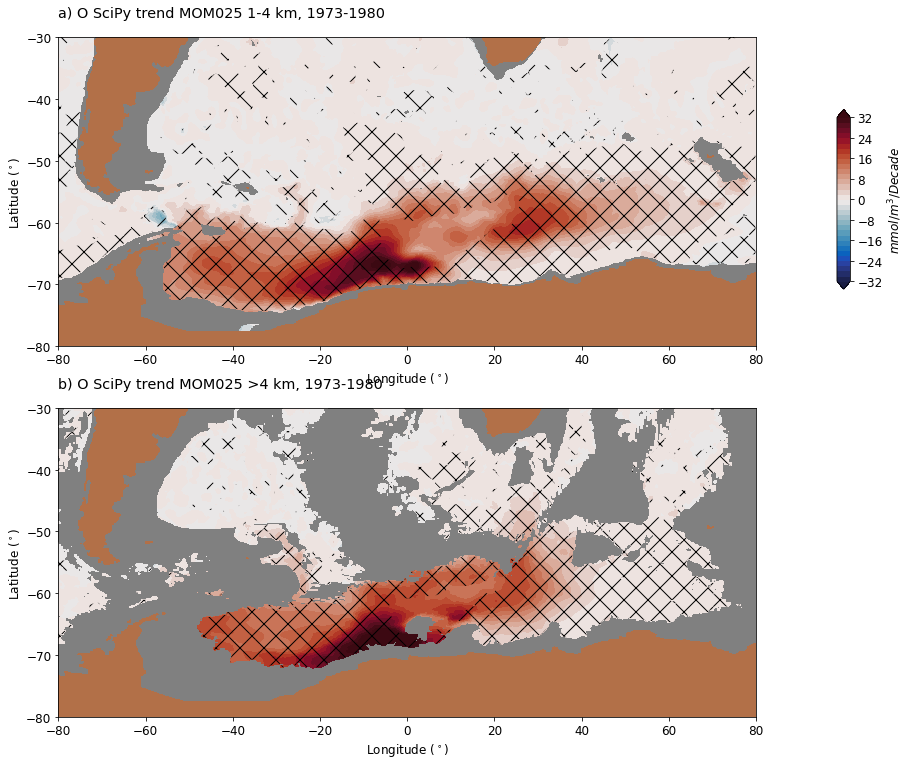

In [104]:
fontsize=12
plt.rcParams['font.size'] = fontsize

plt.figure(figsize(12.5,12.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

clev = np.arange(-32.,34,2)

tr_anom_m=np.load('/g/data/jk72/pas561/mom/archive/wombat_jun16z_wp2_74_stats/np_tr73to80_Oanom_1to4_m.npy')
tr_anom_p=np.load('/g/data/jk72/pas561/mom/archive/wombat_jun16z_wp2_74_stats/np_tr73to80_Oanom_1to4_p.npy')

tr_m = xr.DataArray(tr_anom_m, 
coords={'yt_ocean':yt_ocean[0:500] ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])


tr_p = xr.DataArray(tr_anom_p, 
coords={'yt_ocean':yt_ocean[0:500] ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])

pmax=0.05

mp=tr_m.where(tr_p<=pmax).values

plt.subplot(2,1,1)
plt.gca().patch.set_color('.5')
p1=plt.contourf(geolon_t[0:500,:],geolat_t[0:500,:],tr_m[0:500,:]*10, cmap=cmocean.cm.balance, levels=clev, extend='both') #CMRmap_r, gist_stern_r
p2=plt.contourf(geolon_t[0:500,:],geolat_t[0:500,:],mp, colors='none',hatches='x') #CMRmap_r, gist_stern_r
p3=plt.contourf(geolon_t[0:500,:],geolat_t[0:500,:],msk025[0:500,:],cmap=plt.cm.copper)

plt.xlim((-80,80))
plt.ylim((-80,-30))
plt.xlabel('Longitude ($^\circ$)')
plt.ylabel('Latitude ($^\circ$)')
plt.title('a) O SciPy trend MOM025 1-4 km, 1973-1980',pad=20,loc='left')

tr_anom_m=np.load('/g/data/jk72/pas561/mom/archive/wombat_jun16z_wp2_74_stats/np_tr73to80_Oanom_4to6_m.npy')
tr_anom_p=np.load('/g/data/jk72/pas561/mom/archive/wombat_jun16z_wp2_74_stats/np_tr73to80_Oanom_4to6_p.npy')

tr_m = xr.DataArray(tr_anom_m, 
coords={'yt_ocean':yt_ocean[0:500] ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])


tr_p = xr.DataArray(tr_anom_p, 
coords={'yt_ocean':yt_ocean[0:500] ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])

pmax=0.05

mp=tr_m.where(tr_p<=pmax).values

plt.subplot(2,1,2)
plt.gca().patch.set_color('.5')
p1=plt.contourf(geolon_t[0:500,:],geolat_t[0:500,:],tr_m[0:500,:]*10, cmap=cmocean.cm.balance, levels=clev, extend='both') #CMRmap_r, gist_stern_r
p2=plt.contourf(geolon_t[0:500,:],geolat_t[0:500,:],mp, colors='none',hatches='x') #CMRmap_r, gist_stern_r
p3=plt.contourf(geolon_t[0:500,:],geolat_t[0:500,:],msk025[0:500,:],cmap=plt.cm.copper)

plt.xlim((-80,80))
plt.ylim((-80,-30))
plt.xlabel('Longitude ($^\circ$)')
plt.ylabel('Latitude ($^\circ$)')
plt.title('b) O SciPy trend MOM025 >4 km, 1973-1980',pad=20,loc='left')

    
ax3 = plt.axes([0.99,0.60,0.015,0.2])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
##ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_ylabel('$mmol/m^3/Decade$')

[-6.00000000e-01 -5.50000000e-01 -5.00000000e-01 -4.50000000e-01
 -4.00000000e-01 -3.50000000e-01 -3.00000000e-01 -2.50000000e-01
 -2.00000000e-01 -1.50000000e-01 -1.00000000e-01 -5.00000000e-02
  5.55111512e-16  5.00000000e-02  1.00000000e-01  1.50000000e-01
  2.00000000e-01  2.50000000e-01  3.00000000e-01  3.50000000e-01
  4.00000000e-01  4.50000000e-01  5.00000000e-01  5.50000000e-01
  6.00000000e-01]


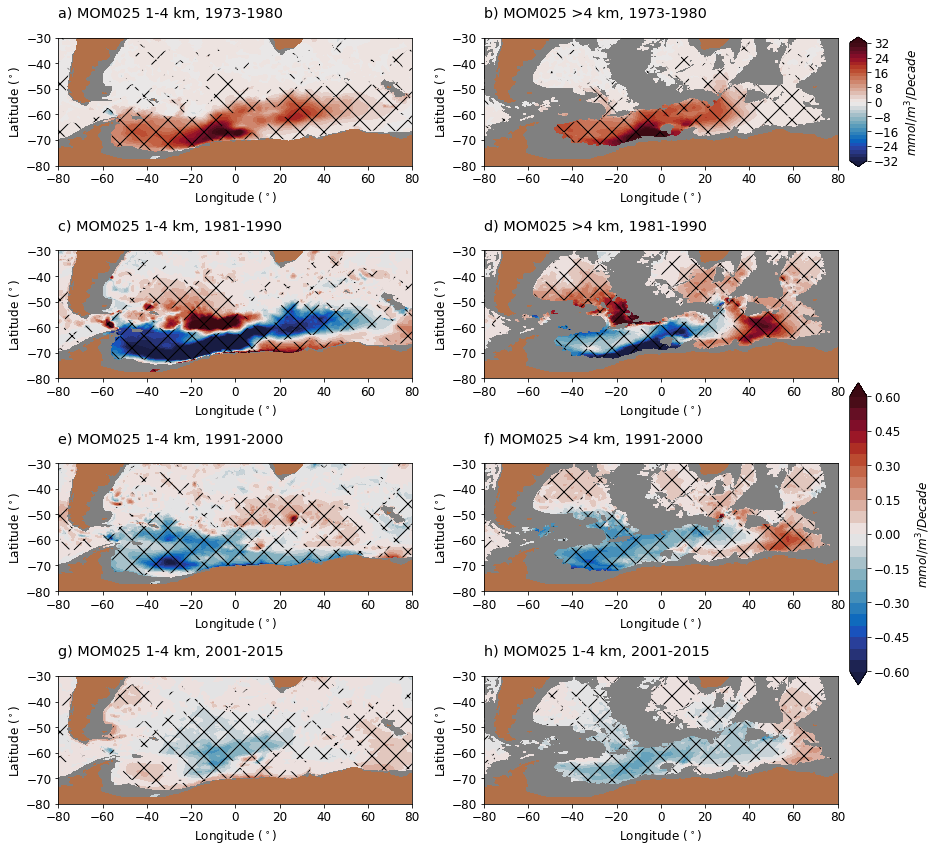

In [34]:
fontsize=12
plt.rcParams['font.size'] = fontsize

plt.figure(figsize(12,12))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

clev = np.arange(-32.,34,2)

tr_anom_m=np.load('/g/data/jk72/pas561/mom/archive/wombat_jun16z_wp2_74_stats/np_tr73to80_Oanom_1to4_m.npy')
tr_anom_p=np.load('/g/data/jk72/pas561/mom/archive/wombat_jun16z_wp2_74_stats/np_tr73to80_Oanom_1to4_p.npy')

m = xr.DataArray(tr_anom_m, 
coords={'yt_ocean':yt_ocean[0:500] ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])

p = xr.DataArray(tr_anom_p, 
coords={'yt_ocean':yt_ocean[0:500] ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])

pmax=0.05
mp=m.where(p<=pmax).values

plt.subplot(4,2,1)
plt.gca().patch.set_color('.5')
p1=plt.contourf(geolon_t[0:500,:],geolat_t[0:500,:],m*10, cmap=cmocean.cm.balance, levels=clev, extend='both') #CMRmap_r, gist_stern_r
p2=plt.contourf(geolon_t[0:500,:],geolat_t[0:500,:],mp, colors='none',hatches='x') #CMRmap_r, gist_stern_r
p3=plt.contourf(geolon_t[0:500,:],geolat_t[0:500,:],msk025[0:500,:],cmap=plt.cm.copper)
plt.xlim((-80,80))
plt.ylim((-80,-30))
plt.xlabel('Longitude ($^\circ$)')
plt.ylabel('Latitude ($^\circ$)')
plt.title('a) MOM025 1-4 km, 1973-1980',pad=20,loc='left')



tr_anom_m=np.load('/g/data/jk72/pas561/mom/archive/wombat_jun16z_wp2_74_stats/np_tr73to80_Oanom_4to6_m.npy')
tr_anom_p=np.load('/g/data/jk72/pas561/mom/archive/wombat_jun16z_wp2_74_stats/np_tr73to80_Oanom_4to6_p.npy')

m = xr.DataArray(tr_anom_m, 
coords={'yt_ocean':yt_ocean[0:500] ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])

p = xr.DataArray(tr_anom_p, 
coords={'yt_ocean':yt_ocean[0:500] ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])

mp=m.where(p<=pmax).values

plt.subplot(4,2,2)
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
plt.gca().patch.set_color('.5')
p1=plt.contourf(geolon_t[0:500,:],geolat_t[0:500,:],m*10, cmap=cmocean.cm.balance, levels=clev, extend='both') #CMRmap_r, gist_stern_r
p2=plt.contourf(geolon_t[0:500,:],geolat_t[0:500,:],mp, colors='none',hatches='x') #CMRmap_r, gist_stern_r
p3=plt.contourf(geolon_t[0:500,:],geolat_t[0:500,:],msk025[0:500,:],cmap=plt.cm.copper)
plt.xlim((-80,80))
plt.ylim((-80,-30))
plt.xlabel('Longitude ($^\circ$)')
plt.ylabel('Latitude ($^\circ$)')
plt.title('b) MOM025 >4 km, 1973-1980',pad=20,loc='left')

ax3 = plt.axes([0.99,0.80,0.02,0.15])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical',shrink = 0.5)
cb.ax.set_ylabel('$mmol/m^3/Decade$')

clev = np.arange(-.6,.65,.05)
print(clev)

tr_anom_m=np.load('/g/data/jk72/pas561/mom/archive/wombat_jun16z_wp2_74_stats/np_tr81to90_Oanom_1to4_m.npy')
tr_anom_p=np.load('/g/data/jk72/pas561/mom/archive/wombat_jun16z_wp2_74_stats/np_tr81to90_Oanom_1to4_p.npy')

m = xr.DataArray(tr_anom_m, 
coords={'yt_ocean':yt_ocean[0:500] ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])

p = xr.DataArray(tr_anom_p, 
coords={'yt_ocean':yt_ocean[0:500] ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])

mp=m.where(p<=pmax).values

plt.subplot(4,2,3)
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
plt.gca().patch.set_color('.5')
p1=plt.contourf(geolon_t[0:500,:],geolat_t[0:500,:],m, cmap=cmocean.cm.balance, levels=clev, extend='both') #CMRmap_r, gist_stern_r
p2=plt.contourf(geolon_t[0:500,:],geolat_t[0:500,:],mp, colors='none',hatches='x') #CMRmap_r, gist_stern_r
p3=plt.contourf(geolon_t[0:500,:],geolat_t[0:500,:],msk025[0:500,:],cmap=plt.cm.copper)
plt.xlim((-80,80))
plt.ylim((-80,-30))
plt.xlabel('Longitude ($^\circ$)')
plt.ylabel('Latitude ($^\circ$)')
plt.title('c) MOM025 1-4 km, 1981-1990',pad=20,loc='left')

tr_anom_m=np.load('/g/data/jk72/pas561/mom/archive/wombat_jun16z_wp2_74_stats/np_tr81to90_Oanom_4to6_m.npy')
tr_anom_p=np.load('/g/data/jk72/pas561/mom/archive/wombat_jun16z_wp2_74_stats/np_tr81to90_Oanom_4to6_p.npy')

m = xr.DataArray(tr_anom_m, 
coords={'yt_ocean':yt_ocean[0:500] ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])

p = xr.DataArray(tr_anom_p, 
coords={'yt_ocean':yt_ocean[0:500] ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])

mp=m.where(p<=pmax).values

plt.subplot(4,2,4)
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
plt.gca().patch.set_color('.5')
p1=plt.contourf(geolon_t[0:500,:],geolat_t[0:500,:],m, cmap=cmocean.cm.balance, levels=clev, extend='both') #CMRmap_r, gist_stern_r
p2=plt.contourf(geolon_t[0:500,:],geolat_t[0:500,:],mp, colors='none',hatches='x') #CMRmap_r, gist_stern_r
p3=plt.contourf(geolon_t[0:500,:],geolat_t[0:500,:],msk025[0:500,:],cmap=plt.cm.copper)
plt.xlim((-80,80))
plt.ylim((-80,-30))
plt.xlabel('Longitude ($^\circ$)')
plt.ylabel('Latitude ($^\circ$)')
plt.title('d) MOM025 >4 km, 1981-1990',pad=20,loc='left')

tr_anom_m=np.load('/g/data/jk72/pas561/mom/archive/wombat_jun16z_wp2_74_stats/np_tr91to00_Oanom_1to4_m.npy')
tr_anom_p=np.load('/g/data/jk72/pas561/mom/archive/wombat_jun16z_wp2_74_stats/np_tr91to00_Oanom_1to4_p.npy')

m = xr.DataArray(tr_anom_m, 
coords={'yt_ocean':yt_ocean[0:500] ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])

p = xr.DataArray(tr_anom_p, 
coords={'yt_ocean':yt_ocean[0:500] ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])

mp=m.where(p<=pmax).values

plt.subplot(4,2,5)
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
plt.gca().patch.set_color('.5')
p1=plt.contourf(geolon_t[0:500,:],geolat_t[0:500,:],m, cmap=cmocean.cm.balance, levels=clev, extend='both') #CMRmap_r, gist_stern_r
p2=plt.contourf(geolon_t[0:500,:],geolat_t[0:500,:],mp, colors='none',hatches='x') #CMRmap_r, gist_stern_r
p3=plt.contourf(geolon_t[0:500,:],geolat_t[0:500,:],msk025[0:500,:],cmap=plt.cm.copper)
plt.xlim((-80,80))
plt.ylim((-80,-30))
plt.xlabel('Longitude ($^\circ$)')
plt.ylabel('Latitude ($^\circ$)')
plt.title('e) MOM025 1-4 km, 1991-2000',pad=20,loc='left')

tr_anom_m=np.load('/g/data/jk72/pas561/mom/archive/wombat_jun16z_wp2_74_stats/np_tr91to00_Oanom_4to6_m.npy')
tr_anom_p=np.load('/g/data/jk72/pas561/mom/archive/wombat_jun16z_wp2_74_stats/np_tr91to00_Oanom_4to6_p.npy')

m = xr.DataArray(tr_anom_m, 
coords={'yt_ocean':yt_ocean[0:500] ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])

p = xr.DataArray(tr_anom_p, 
coords={'yt_ocean':yt_ocean[0:500] ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])

mp=m.where(p<=pmax).values

plt.subplot(4,2,6)
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
plt.gca().patch.set_color('.5')
p1=plt.contourf(geolon_t[0:500,:],geolat_t[0:500,:],m, cmap=cmocean.cm.balance, levels=clev, extend='both') #CMRmap_r, gist_stern_r
p2=plt.contourf(geolon_t[0:500,:],geolat_t[0:500,:],mp, colors='none',hatches='x') #CMRmap_r, gist_stern_r
p3=plt.contourf(geolon_t[0:500,:],geolat_t[0:500,:],msk025[0:500,:],cmap=plt.cm.copper)
plt.xlim((-80,80))
plt.ylim((-80,-30))
plt.xlabel('Longitude ($^\circ$)')
plt.ylabel('Latitude ($^\circ$)')
plt.title('f) MOM025 >4 km, 1991-2000',pad=20,loc='left')


tr_anom_m=np.load('/g/data/jk72/pas561/mom/archive/wombat_jun16z_wp2_74_stats/np_tr01to15_Oanom_1to4_m.npy')
tr_anom_p=np.load('/g/data/jk72/pas561/mom/archive/wombat_jun16z_wp2_74_stats/np_tr01to15_Oanom_1to4_p.npy')

m = xr.DataArray(tr_anom_m, 
coords={'yt_ocean':yt_ocean[0:500] ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])

p = xr.DataArray(tr_anom_p, 
coords={'yt_ocean':yt_ocean[0:500] ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])

mp=m.where(p<=pmax).values

plt.subplot(4,2,7)
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
plt.gca().patch.set_color('.5')
p1=plt.contourf(geolon_t[0:500,:],geolat_t[0:500,:],m, cmap=cmocean.cm.balance, levels=clev, extend='both') #CMRmap_r, gist_stern_r
p2=plt.contourf(geolon_t[0:500,:],geolat_t[0:500,:],mp, colors='none',hatches='x') #CMRmap_r, gist_stern_r
p3=plt.contourf(geolon_t[0:500,:],geolat_t[0:500,:],msk025[0:500,:],cmap=plt.cm.copper)
plt.xlim((-80,80))
plt.ylim((-80,-30))
plt.xlabel('Longitude ($^\circ$)')
plt.ylabel('Latitude ($^\circ$)')
plt.title('g) MOM025 1-4 km, 2001-2015',pad=20,loc='left')

tr_anom_m=np.load('/g/data/jk72/pas561/mom/archive/wombat_jun16z_wp2_74_stats/np_tr01to15_Oanom_4to6_m.npy')
tr_anom_p=np.load('/g/data/jk72/pas561/mom/archive/wombat_jun16z_wp2_74_stats/np_tr01to15_Oanom_4to6_p.npy')

m = xr.DataArray(tr_anom_m, 
coords={'yt_ocean':yt_ocean[0:500] ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])

p = xr.DataArray(tr_anom_p, 
coords={'yt_ocean':yt_ocean[0:500] ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])

mp=m.where(p<=pmax).values

plt.subplot(4,2,8)
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
plt.gca().patch.set_color('.5')
p1=plt.contourf(geolon_t[0:500,:],geolat_t[0:500,:],m, cmap=cmocean.cm.balance, levels=clev, extend='both') #CMRmap_r, gist_stern_r
p2=plt.contourf(geolon_t[0:500,:],geolat_t[0:500,:],mp, colors='none',hatches='x') #CMRmap_r, gist_stern_r
p3=plt.contourf(geolon_t[0:500,:],geolat_t[0:500,:],msk025[0:500,:],cmap=plt.cm.copper)
plt.xlim((-80,80))
plt.ylim((-80,-30))
plt.xlabel('Longitude ($^\circ$)')
plt.ylabel('Latitude ($^\circ$)')
plt.title('h) MOM025 1-4 km, 2001-2015',pad=20,loc='left')

ax3 = plt.axes([0.99,0.20,0.02,0.35])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical',shrink = 0.5)
cb.ax.set_ylabel('$mmol/m^3/Decade$')

plt.tight_layout()

#of = '/g/data/v45/pas561/mom/archive//wp2_figs/Fig_OTrend_withPvals.png'
of='/scratch/jk72/pas561/Fig_OTrend_withPvals.png'
plt.savefig(of,dpi=220,bbox_inches='tight')